# Lecture 18 Jupyter Notebook
### Date: October 10, 2025
### By: Suzanne S. Sindi

This notebook contains code for making figures in Lecture 18. There are two parts:

1) Pareto Distribution and Lorenz Curves
2) Normal Distribution Calculations

### Part 1: Pareto Distribution and Lorenz Curves

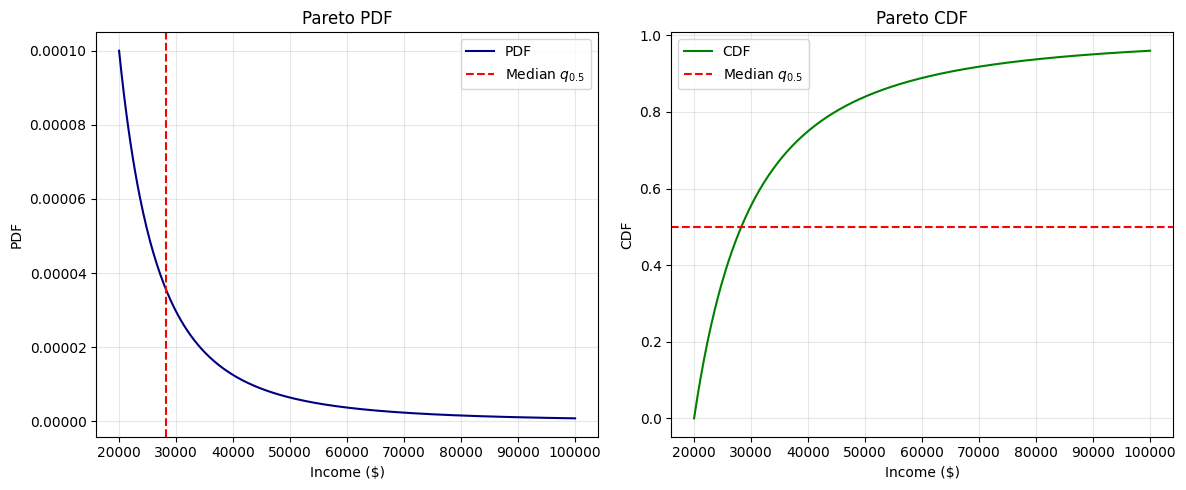

In [26]:
# import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

# Parameters
x_m = 20000
alpha = 2

# Median
q_05 = x_m * 2**(1/alpha)

# x values for plotting
x = np.linspace(x_m, 100000, 400)

# PDF and CDF
pdf = pareto.pdf(x, b=alpha, scale=x_m)
cdf = pareto.cdf(x, b=alpha, scale=x_m)

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# --- PDF plot ---
axes[0].plot(x, pdf, color='navy', label='PDF')
axes[0].axvline(q_05, color='red', linestyle='--', label=r'Median $q_{0.5}$')
axes[0].set_xlabel('Income ($)')
axes[0].set_ylabel('PDF')
axes[0].set_title('Pareto PDF')
axes[0].legend()
axes[0].grid(alpha=0.3)

# --- CDF plot ---
axes[1].plot(x, cdf, color='green', label='CDF')
axes[1].axhline(0.5, color='red', linestyle='--', label=r'Median $q_{0.5}$')
axes[1].set_xlabel('Income ($)')
axes[1].set_ylabel('CDF')
axes[1].set_title('Pareto CDF')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


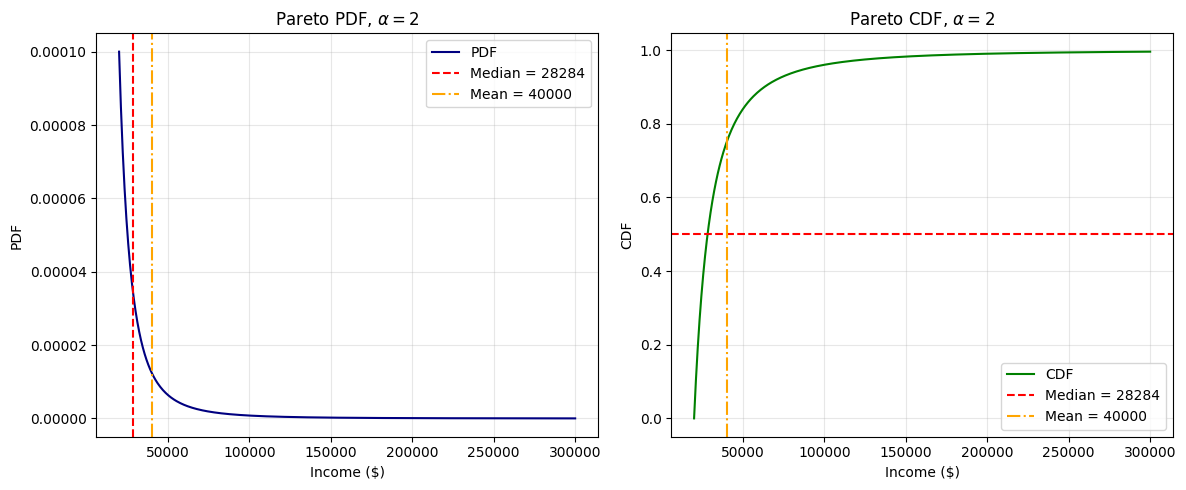

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

# Parameters
x_m = 20000
alpha = 2

# Median
q_05 = x_m * 2**(1/alpha)

# Mean
mean = alpha * x_m / (alpha - 1)

# x values (extended further to show tail)
x = np.linspace(x_m, 300000, 500)

# PDF and CDF
pdf = pareto.pdf(x, b=alpha, scale=x_m)
cdf = pareto.cdf(x, b=alpha, scale=x_m)

# Side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# --- PDF ---
axes[0].plot(x, pdf, color='navy', label='PDF')
axes[0].axvline(q_05, color='red', linestyle='--', label=f'Median = {int(q_05)}')
axes[0].axvline(mean, color='orange', linestyle='-.', label=f'Mean = {int(mean)}')
axes[0].set_xlabel('Income ($)')
axes[0].set_ylabel('PDF')
axes[0].set_title(fr'Pareto PDF, $\alpha={alpha}$')
axes[0].legend()
axes[0].grid(alpha=0.3)

# --- CDF ---
axes[1].plot(x, cdf, color='green', label='CDF')
axes[1].axhline(0.5, color='red', linestyle='--', label=f'Median = {int(q_05)}')
axes[1].axvline(mean, color='orange', linestyle='-.', label=f'Mean = {int(mean)}')
axes[1].set_xlabel('Income ($)')
axes[1].set_ylabel('CDF')
axes[1].set_title(fr'Pareto CDF, $\alpha={alpha}$')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


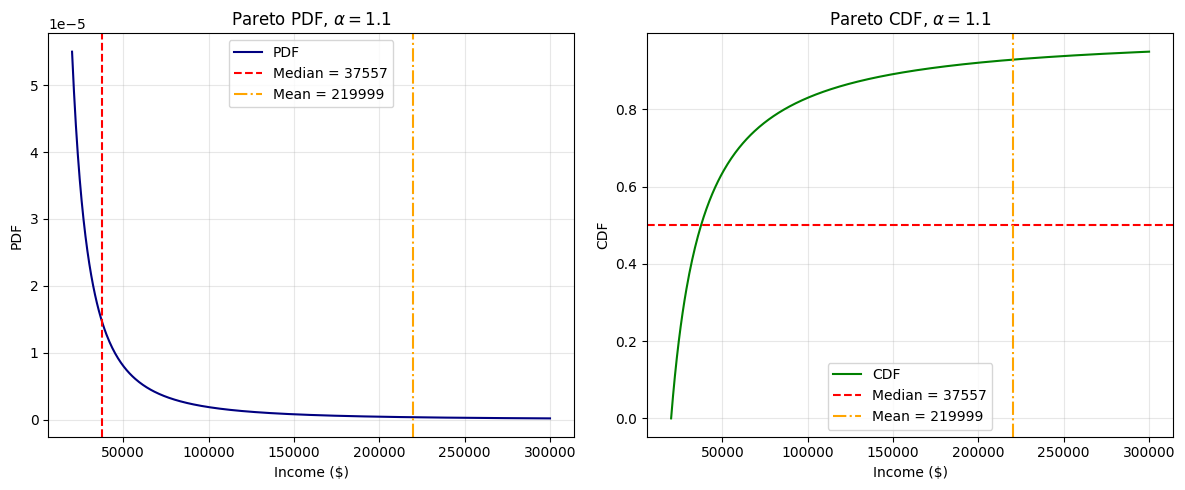

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

# Parameters
x_m = 20000
alpha = 1.1

# Median
q_05 = x_m * 2**(1/alpha)

# Mean
mean = alpha * x_m / (alpha - 1)

# x values (same extended range to compare)
x = np.linspace(x_m, 300000, 500)

# PDF and CDF
pdf = pareto.pdf(x, b=alpha, scale=x_m)
cdf = pareto.cdf(x, b=alpha, scale=x_m)

# Side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# --- PDF ---
axes[0].plot(x, pdf, color='navy', label='PDF')
axes[0].axvline(q_05, color='red', linestyle='--', label=f'Median = {int(q_05)}')
axes[0].axvline(mean, color='orange', linestyle='-.', label=f'Mean = {int(mean)}')
axes[0].set_xlabel('Income ($)')
axes[0].set_ylabel('PDF')
axes[0].set_title(fr'Pareto PDF, $\alpha={alpha}$')
axes[0].legend()
axes[0].grid(alpha=0.3)

# --- CDF ---
axes[1].plot(x, cdf, color='green', label='CDF')
axes[1].axhline(0.5, color='red', linestyle='--', label=f'Median = {int(q_05)}')
axes[1].axvline(mean, color='orange', linestyle='-.', label=f'Mean = {int(mean)}')
axes[1].set_xlabel('Income ($)')
axes[1].set_ylabel('CDF')
axes[1].set_title(fr'Pareto CDF, $\alpha={alpha}$')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


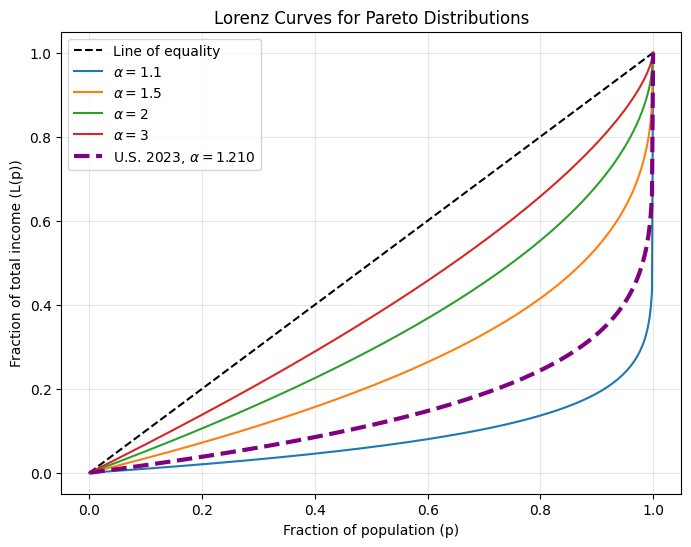

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Pareto alpha values
alphas = [1.1, 1.5, 2, 3]
alpha_us = 1.21  # matches Gini = 0.418
p = np.linspace(0, 1, 500)  # population fraction

# Plot
plt.figure(figsize=(8,6))

# Line of equality
plt.plot(p, p, color='black', linestyle='--', label='Line of equality')

# Lorenz curves for original alphas
for alpha in alphas:
    L_p = 1 - (1 - p)**((alpha - 1)/alpha)
    plt.plot(p, L_p, label=fr'$\alpha={alpha}$')

# Lorenz curve for "U.S. 2023"
L_us = 1 - (1 - p)**((alpha_us - 1)/alpha_us)
plt.plot(p, L_us, color='purple', linestyle='--', linewidth=3, label=fr'U.S. 2023, $\alpha={alpha_us:.3f}$')

# Labels and legend
plt.xlabel('Fraction of population (p)')
plt.ylabel('Fraction of total income (L(p))')
plt.title('Lorenz Curves for Pareto Distributions')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


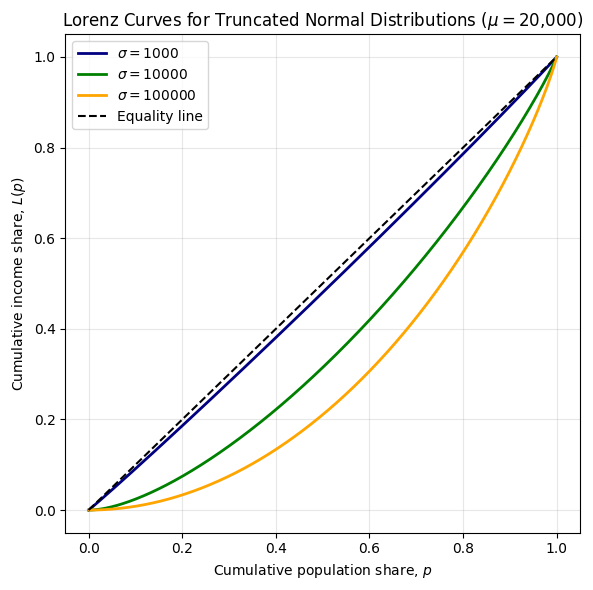

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# --- Parameters ---
mu = 20000
sigmas = [1000, 10000, 100000]
colors = ['navy', 'green', 'orange']

# --- Plot setup ---
p = np.linspace(0, 1, 500)
plt.figure(figsize=(6,6))

for sigma, color in zip(sigmas, colors):
    # Truncated Normal distribution (no negative incomes)
    dist = truncnorm(a=(0 - mu)/sigma, b=np.inf, loc=mu, scale=sigma)
    
    # Sample data to approximate Lorenz curve
    x = dist.rvs(200000)
    x = np.sort(x)
    cum_income = np.cumsum(x)
    cum_income /= cum_income[-1]  # normalize to 1
    
    # Population proportion
    pop_share = np.linspace(0, 1, len(x))
    
    # Plot Lorenz curve
    plt.plot(pop_share, cum_income, color=color, lw=2, label=fr'$\sigma={sigma}$')

# Equality line (perfect equality)
plt.plot([0, 1], [0, 1], 'k--', lw=1.5, label='Equality line')

plt.xlabel('Cumulative population share, $p$')
plt.ylabel('Cumulative income share, $L(p)$')
plt.title('Lorenz Curves for Truncated Normal Distributions ($\\mu=20{,}000$)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


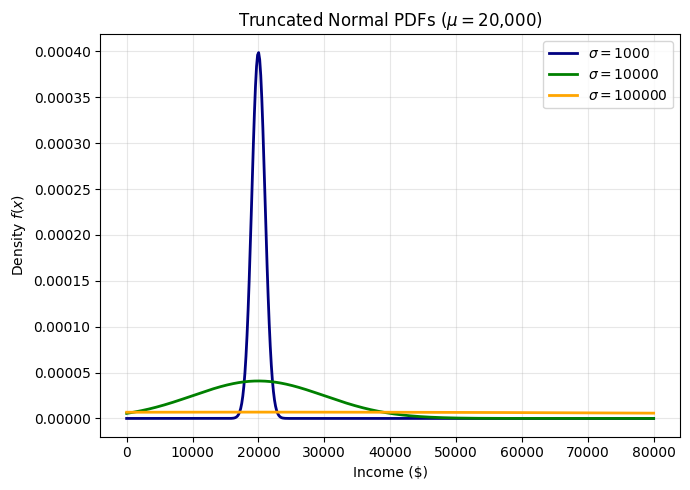

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# --- Parameters ---
mu = 20000
sigmas = [1000, 10000, 100000]
colors = ['navy', 'green', 'orange']

# --- X values (wide range for biggest sigma) ---
x = np.linspace(0, 80000, 500)

# --- Plot PDFs ---
plt.figure(figsize=(7,5))

for sigma, color in zip(sigmas, colors):
    a = (0 - mu) / sigma
    b = np.inf
    dist = truncnorm(a=a, b=b, loc=mu, scale=sigma)
    y = dist.pdf(x)
    plt.plot(x, y, lw=2, color=color, label=fr'$\sigma={sigma}$')

plt.title('Truncated Normal PDFs ($\\mu=20{,}000$)')
plt.xlabel('Income ($)')
plt.ylabel('Density $f(x)$')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Part 2: Normal Distributions

Standardized Z = -2.00
P(X < 9) = P(Z < -2.00) = 0.0228


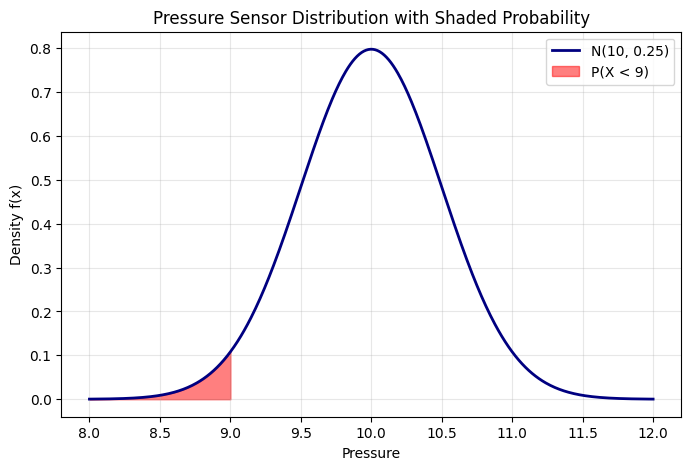

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Parameters for the pressure sensor ---
mu = 10         # mean pressure
sigma = 0.5     # standard deviation
x_val = 9       # threshold to calculate P(X < 9)

# --- Step 1: Standardize ---
z = (x_val - mu) / sigma
print(f"Standardized Z = {z:.2f}")

# --- Step 2: Compute probability using standard normal CDF ---
p = norm.cdf(z)
print(f"P(X < {x_val}) = P(Z < {z:.2f}) = {p:.4f}")  # ~0.0228

# --- Plot the PDF ---
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)
pdf = norm.pdf(x, loc=mu, scale=sigma)

plt.figure(figsize=(8,5))
plt.plot(x, pdf, color='navy', lw=2, label=f'N({mu}, {sigma**2})')

# --- Shade the left tail ---
x_fill = np.linspace(mu - 4*sigma, x_val, 200)
plt.fill_between(x_fill, 0, norm.pdf(x_fill, mu, sigma), color='red', alpha=0.5, label=f'P(X < {x_val})')

# --- Labels and legend ---
plt.title('Pressure Sensor Distribution with Shaded Probability')
plt.xlabel('Pressure')
plt.ylabel('Density f(x)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


P(rod fails) = 0.3173
P(rod succeeds) = 0.6827


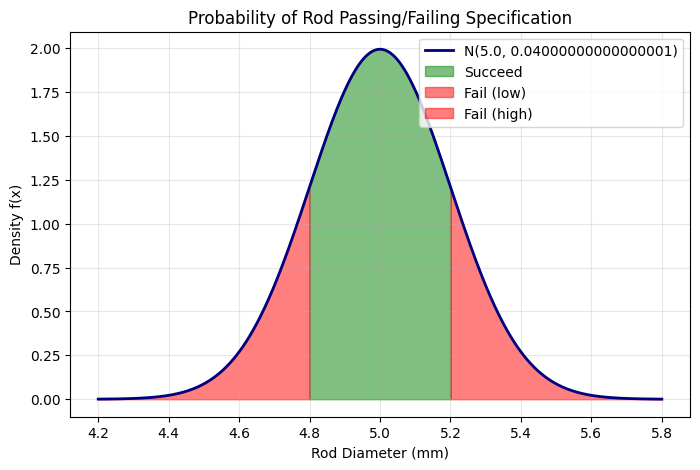

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Parameters ---
mu = 5.0          # mean diameter (mm)
sigma = 0.2       # standard deviation
lower = 4.8       # lower tolerance
upper = 5.2       # upper tolerance

# --- Standardize bounds ---
z_lower = (lower - mu) / sigma
z_upper = (upper - mu) / sigma

# --- Probability calculations ---
p_pass = norm.cdf(z_upper) - norm.cdf(z_lower)
p_fail = 1 - p_pass
print(f"P(rod fails) = {p_fail:.4f}")
print(f"P(rod succeeds) = {p_pass:.4f}")

# --- x values for plotting ---
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)
pdf = norm.pdf(x, loc=mu, scale=sigma)

plt.figure(figsize=(8,5))

# PDF
plt.plot(x, pdf, color='navy', lw=2, label=f'N({mu}, {sigma**2})')

# --- Shade succeed region (green) ---
x_fill_pass = np.linspace(lower, upper, 200)
plt.fill_between(x_fill_pass, 0, norm.pdf(x_fill_pass, mu, sigma), color='green', alpha=0.5, label='Succeed')

# --- Shade fail regions (red) ---
x_fill_fail_low = np.linspace(mu - 4*sigma, lower, 200)
plt.fill_between(x_fill_fail_low, 0, norm.pdf(x_fill_fail_low, mu, sigma), color='red', alpha=0.5, label='Fail (low)')

x_fill_fail_high = np.linspace(upper, mu + 4*sigma, 200)
plt.fill_between(x_fill_fail_high, 0, norm.pdf(x_fill_fail_high, mu, sigma), color='red', alpha=0.5, label='Fail (high)')

# --- Labels and legend ---
plt.title('Probability of Rod Passing/Failing Specification')
plt.xlabel('Rod Diameter (mm)')
plt.ylabel('Density f(x)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
